# EDA Vancouver Harbour Weather 

### Time Series Modelling using Prophet

Prophet is an open-source forecasting tool developed by Meta. It is based on GAM (Generalized Additive Model). It is capable of handling seasonal changes granualarly, meaning it can detect seasonality by day, week, month, and year Kwarteng & Andreevich, 2024. Prophet requires minimal data preprocesing and offers uncertainty estimation via prediction intervals [(Kwarteng & Andreevich, 2024)](#https://www.researchgate.net/publication/385157901_Comparative_Analysis_of_ARIMA_SARIMA_and_Prophet_Model_in_Forecasting/fulltext/6718b88c069cb92a812c82d6/Comparative-Analysis-of-ARIMA-SARIMA-and-Prophet-Model-in-Forecasting.pdf?origin=publication_detail&_tp=eyJjb250ZXh0Ijp7ImZpcnN0UGFnZSI6InB1YmxpY2F0aW9uIiwicGFnZSI6InB1YmxpY2F0aW9uRG93bmxvYWQiLCJwcmV2aW91c1BhZ2UiOiJwdWJsaWNhdGlvbiJ9fQ&__cf_chl_tk=ONKOKE37tshen4ThR_nEGdYG2M27sQWiKCqtRtlijoE-1761184569-1.0.1.1-spKYtHkxdnyqYKSZEEYkOPkrtztFPHECFkhLtyZXuFA).

## Install Libraries

In [1]:
import sys; print(sys.executable)

/opt/anaconda3/bin/python


In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import prophet
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
# calculates MAPE - mean absolute percentage error 
def mean_absolute_percentage_error(y_true, y_pred):
    y_true_, y_pred = np.array(y_true, y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [43]:
df = pd.read_csv('/Users/dianarogachova/Desktop/prophet/data/weather_data_cleaned.csv')
df.head(5)

,longitude,latitude,station_name,climate_id,date_time,year,month,day,max_temp,min_temp,mean_temp,heat_deg_days,cool_deg_days,total_rain,total_snow,total_percip
0,-123.12,49.3,VANCOUVER HARBOUR CS,1108446,1982-01-01,1982,1,1,2.2,0.7,1.5,16.5,0.0,0.0,6.8,6.8
1,-123.12,49.3,VANCOUVER HARBOUR CS,1108446,1982-01-02,1982,1,2,1.2,-1.1,0.1,17.9,0.0,0.0,6.0,6.0
2,-123.12,49.3,VANCOUVER HARBOUR CS,1108446,1982-01-03,1982,1,3,0.1,-4.5,-2.2,20.2,0.0,0.0,0.0,0.0
3,-123.12,49.3,VANCOUVER HARBOUR CS,1108446,1982-01-04,1982,1,4,-1.9,-5.6,-3.8,21.8,0.0,0.0,0.0,0.0
4,-123.12,49.3,VANCOUVER HARBOUR CS,1108446,1982-01-05,1982,1,5,-4.4,-7.8,-6.1,24.1,0.0,0.0,0.0,0.0


sanity check

In [10]:
df.isna().sum().sum()

np.int64(0)

## Train-Test Split

In [ ]:
#ensure date column is in datetime format
df['date_time'] = pd.to_datetime(df['date_time'])

df = df.set_index('date_time').sort_index()

split_date = '2010-01-01'

train = df.loc[:split_date].copy()
test = df.loc[split_date:].copy()


print("Train:", train.index.min(), "→", train.index.max(), "| Rows:", len(train))
print("Test :", test.index.min(),  "→", test.index.max(),  "| Rows:", len(test))


Train: 1970-01-02 00:00:00 → 2010-01-01 00:00:00 | Rows: 12936
Test : 2010-01-01 00:00:00 → 2020-12-31 00:00:00 | Rows: 3804


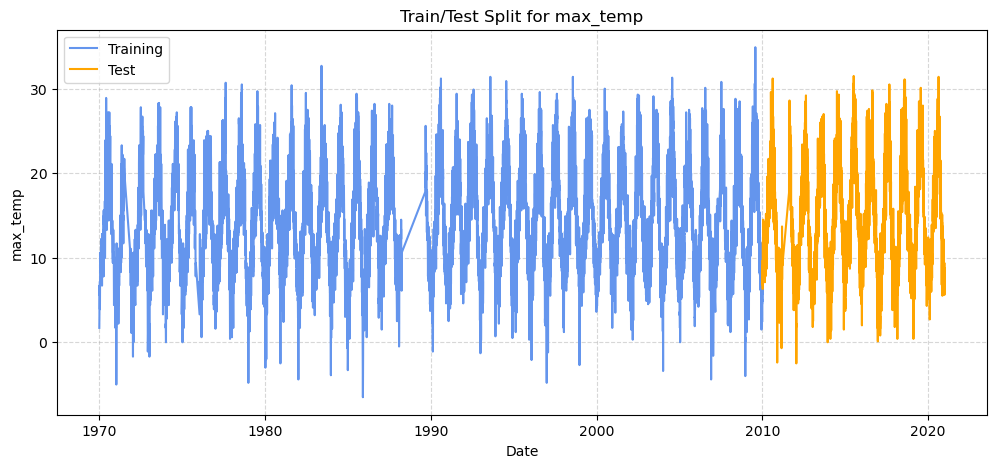

In [47]:
col = 'max_temp'

plt.figure(figsize=(12, 5))
plt.plot(train.index, train[col], label='Training', color='cornflowerblue')
plt.plot(test.index, test[col], label='Test', color='orange')
plt.title(f'Train/Test Split for {col}')
plt.xlabel('Date')
plt.ylabel(col)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()